In [1]:
#Load libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
import KNN

In [2]:
#Changing the directoy
os.chdir("E:\Edwisor\Project")

In [3]:
#Loading the csv
bike_rental_data =  pd.read_csv("Day.csv", index_col = 0)

## Missing Value Analysis

In [4]:
#Calculating the null values in the dataframe
missing_value = pd.DataFrame(bike_rental_data.isnull().sum())
missing_value = (missing_value/len(bike_rental_data))*100
missing_value.reset_index()

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False)
#save output results 
missing_value.to_csv("Missing_perc.csv", index = False)
missing_value

##There is no missing value in the dataframe

,Missing_percentage
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


## Outlier Analysis

{'boxes': [<matplotlib.lines.Line2D at 0xbda3ba8>],
 'caps': [<matplotlib.lines.Line2D at 0xbdba320>,
 'fliers': [<matplotlib.lines.Line2D at 0xbdbacf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbdba9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbda3c50>,
  <matplotlib.lines.Line2D at 0xbda3f98>]}

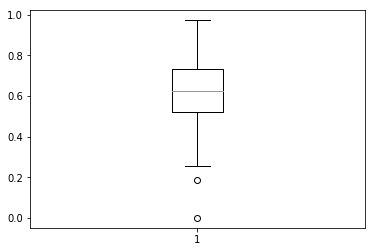

In [5]:
%matplotlib inline
plt.boxplot(bike_rental_data['hum'])

#Negetive outlier found in hum

{'boxes': [<matplotlib.lines.Line2D at 0xbc8c828>],
 'caps': [<matplotlib.lines.Line2D at 0xbc8cf60>,
 'fliers': [<matplotlib.lines.Line2D at 0xbc9c978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbc9c630>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbc8c8d0>,
  <matplotlib.lines.Line2D at 0xbc8cc18>]}

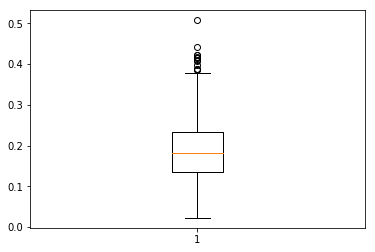

In [6]:
%matplotlib inline
plt.boxplot(bike_rental_data['windspeed'])

#Positive outliers found in windspeed

In [11]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]
pnames = ["temp","hum","windspeed"]

In [8]:
#Detect & Delete Outliers
for i in pnames :
    print (i)
    q75,q25 = np.percentile(bike_rental_data.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] < min].index)
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] > max].index)   

temp
-0.14041600000000015
1.1329160000000003
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


## Feature Engineering

In [12]:
#Converting redpective variables to required data format 
bike_rental_data['dteday'] = pd.to_datetime(bike_rental_data['dteday'],yearfirst=True)
bike_rental_data['season'] = bike_rental_data['season'].astype('category')
bike_rental_data['yr'] = bike_rental_data['yr'].astype('category')
bike_rental_data['mnth'] = bike_rental_data['mnth'].astype('category')
bike_rental_data['holiday'] = bike_rental_data['holiday'].astype('category')
bike_rental_data['weekday'] = bike_rental_data['weekday'].astype('category')
bike_rental_data['workingday'] = bike_rental_data['workingday'].astype('category')
bike_rental_data['weathersit'] = bike_rental_data['weathersit'].astype('category')

bike_rental_data['temp'] = bike_rental_data['temp'].astype('float')
bike_rental_data['atemp'] = bike_rental_data['atemp'].astype('float')
bike_rental_data['hum'] = bike_rental_data['hum'].astype('float')
bike_rental_data['windspeed'] = bike_rental_data['windspeed'].astype('float')
bike_rental_data['casual'] = bike_rental_data['casual'].astype('float')
bike_rental_data['registered'] = bike_rental_data['registered'].astype('float')
bike_rental_data['cnt'] = bike_rental_data['cnt'].astype('float')

## Feature Selection

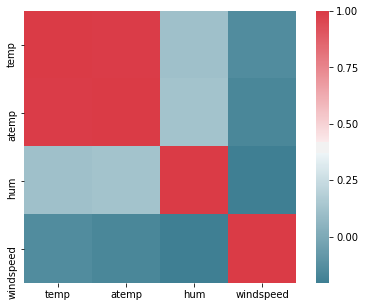

In [13]:
##Feature selection o the basis of various features like correlation, multicollinearity.
#Correlation Plot
df_corr = bike_rental_data.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



In [14]:
#Chi Square Test of Independence
#Saving Categorical Numbers
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [16]:
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_rental_data['cnt'], bike_rental_data[i]))
    print(dof)

season
2049
yr
683
mnth
7513
holiday
683
weekday
4098
workingday
683
weathersit
1366


In [17]:
#Removing variables atemp beacuse it is highly correlated with temp,
#Removing weekday,holiday because they don;t contribute much to the independent cariable
#Removing Causal and registered becuase that's what we need to predict.

bike_rental_data = bike_rental_data.drop(['atemp','holiday','workingday','casual','registered'], axis =1)

## Exploratory Data Analysis

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


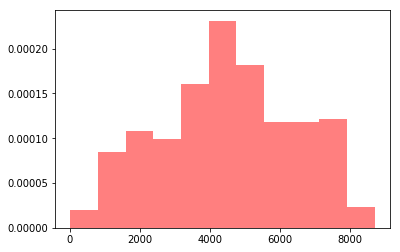

In [18]:
#Distribution of cnt
%matplotlib inline

num_bins = 11
plt.hist(bike_rental_data['cnt'], num_bins, normed=1, facecolor='red', alpha=0.5)
plt.show()

mnth
1     61
2     53
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0,0.5,'Total Bikes Rented')

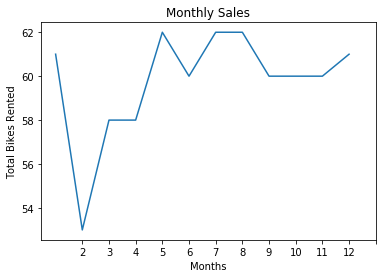

In [19]:
#Bike Rentals Monthly
sales_by_month = bike_rental_data.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

Text(0,0.5,'Total BIkes Rented')

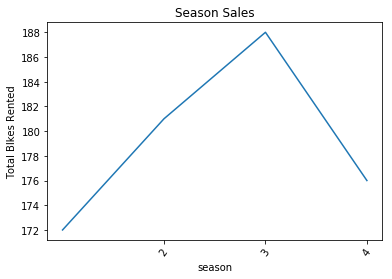

In [20]:
#Sales by Season
sales_by_weekday = bike_rental_data.groupby('season').size()
plot_by_day = sales_by_weekday.plot(title='Season Sales',xticks=(range(1,4)),rot=55)
plot_by_day.set_xlabel('season')
plot_by_day.set_ylabel('Total BIkes Rented')

## Model Development

In [21]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

C:\Users\Hasan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#Divide data into train and test
X = bike_rental_data.values[:,1:9]
Y = bike_rental_data.values[:,9]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

In [23]:
from sklearn.ensemble import RandomForestRegressor

#RF_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 86.0, '%.')


In [ ]:
##Conclusion
#Random Forect Model hs been developed and result calculated. 